## Get Data

In [1]:
import pandas as pd
import os

# Directory containing the CSV files
data_dir = "/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/3_Semester/Business Data Processing/cbs-bdp-market-review-dashboard/data"

# List to store DataFrames
df_list = []

# Loop through the CSV files and read them
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        df_list.append(df)

# Concatenate all DataFrames into one big DataFrame
big_df = pd.concat(df_list, ignore_index=True)

# Display information about the merged DataFrame
print(big_df.columns)


Index(['Transaction Name', 'Transaction Name URL', 'Organization Industries',
       'Lead Investors', 'Investor Names', 'Money Raised',
       'Money Raised Currency', 'Money Raised (in USD)', 'Funding Type',
       'Announced Date', 'Pre-Money Valuation', 'Pre-Money Valuation Currency',
       'Pre-Money Valuation (in USD)', 'Organization Name',
       'Organization Name URL', 'Organization Location',
       'Organization Description', 'Organization Website', 'Funding Stage',
       'Number of Funding Rounds', 'Total Funding Amount',
       'Total Funding Amount Currency', 'Total Funding Amount (in USD)',
       'Equity Only Funding', 'Funding Status', 'Number of Investors'],
      dtype='object')


## Create cluste based on Total Funding Amount in USD

/var/folders/cw/nsgz30_17pq84g4s1jh0lgtw0000gp/T/ipykernel_79986/4090594570.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_fa['funding_amount_cluster'] = dbscan.fit_predict(funding_amount)


Unique Clusters: [0 1 2]


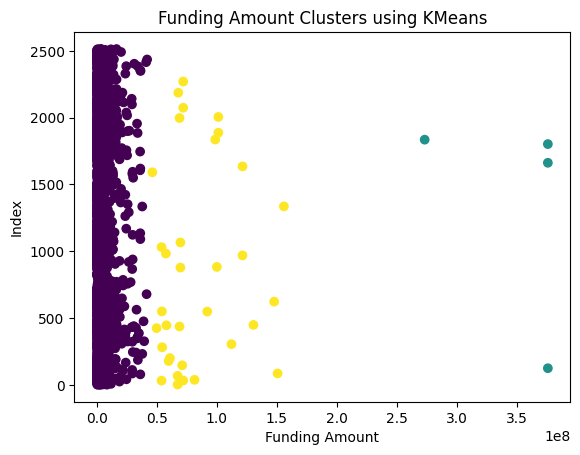

In [7]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

#create a cleared copy of the dataframe
df_na_fa = big_df.dropna(subset=['Total Funding Amount (in USD)'])

funding_amount = df_na_fa[['Total Funding Amount (in USD)']]
    
# Fit DBSCAN clustering
dbscan = KMeans(n_clusters=3, random_state=42)
df_na_fa['funding_amount_cluster'] = dbscan.fit_predict(funding_amount)

# Display unique clusters
print("Unique Clusters:", np.unique(df_na_fa['funding_amount_cluster']))

# Plotting the clusters
plt.scatter(funding_amount, range(len(funding_amount)), c=df_na_fa['funding_amount_cluster'], cmap='viridis')
plt.xlabel('Funding Amount')
plt.ylabel('Index')
plt.title('Funding Amount Clusters using KMeans')
plt.show()

# Left join the 'funding_amount_cluster' column with the original big_df
big_df = big_df.merge(df_na_fa[['funding_amount_cluster']], left_index=True, right_index=True, how='left')

In [73]:
big_df.head(5)

,Transaction Name,Transaction Name URL,Organization Industries,Lead Investors,Investor Names,Money Raised,Money Raised Currency,Money Raised (in USD),Funding Type,Announced Date,...,Organization Website,Funding Stage,Number of Funding Rounds,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Equity Only Funding,Funding Status,Number of Investors,funding_amount_cluster
0,Seed Round - Flagright,https://www.crunchbase.com/funding_round/flagr...,"Compliance, Financial Services, FinTech, Fraud...",Moonfire Ventures,"Charles Delingpole, Donald Bringmann, Erik Mut...",2800000.0,USD,2800000.0,Seed,2022-07-07,...,https://flagright.com,Seed,1,2800000.0,USD,2800000.0,Yes,Seed,11.0,0.0
1,Seed Round - aboutuz,https://www.crunchbase.com/funding_round/about...,"Apps, Lifestyle, Mobile, Social Media",FasterCapital,FasterCapital,632000.0,USD,632000.0,Seed,2022-03-01,...,https://www.aboutuz.com,Seed,1,632000.0,USD,632000.0,Yes,Seed,1.0,0.0
2,Seed Round - Kubermatic,https://www.crunchbase.com/funding_round/kuber...,"Enterprise, SaaS, Software",NetApp Excellerator,NetApp Excellerator,NaN,NaN,NaN,Seed,2022-04-27,...,https://www.kubermatic.com,Seed,3,8300000.0,USD,8300000.0,Yes,Seed,1.0,0.0
3,Seed Round - MYNE Homes,https://www.crunchbase.com/funding_round/myne-...,"Real Estate, Real Estate Investment, Rental Pr...",NaN,"Alexander Artope, Christian Gaiser, Embedded C...",23500000.0,EUR,23938847.0,Seed,2022-07-08,...,https://www.myne-homes.de,Seed,4,63500000.0,EUR,67268844.0,Yes,Early Stage Venture,15.0,2.0
4,Pre Seed Round - Emulate Energy,https://www.crunchbase.com/funding_round/emula...,"Energy, Energy Efficiency, Software",NaN,"AxSol, Edument, Skellefteå Kraft, Utvecklingsk...",21956027.0,SEK,2092864.0,Pre-Seed,2022-07-15,...,https://www.emulate.energy/,Seed,3,56561291.0,SEK,5396545.0,Yes,Seed,4.0,0.0


## Create cluste based on Money Raised in USD

Unique Clusters: [0 1 2 3]


/var/folders/cw/nsgz30_17pq84g4s1jh0lgtw0000gp/T/ipykernel_79986/2937917236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_mr['money_reaised_cluster'] = dbscan.fit_predict(money_raised)


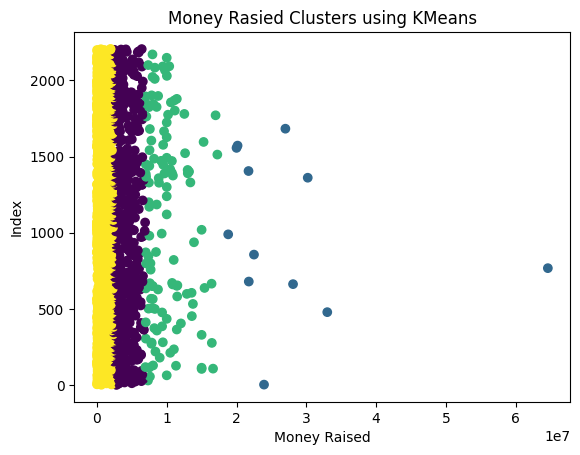

In [8]:
#create a cleared copy of the dataframe
df_na_mr = big_df.dropna(subset=['Money Raised (in USD)'])

money_raised = df_na_mr[['Money Raised (in USD)']]
    
# Fit DBSCAN clustering
dbscan = KMeans(n_clusters=4, random_state=42)
df_na_mr['money_reaised_cluster'] = dbscan.fit_predict(money_raised)

# Display unique clusters
print("Unique Clusters:", np.unique(df_na_mr['money_reaised_cluster']))

# Plotting the clusters
plt.scatter(money_raised, range(len(money_raised)), c=df_na_mr['money_reaised_cluster'], cmap='viridis')
plt.xlabel('Money Raised')
plt.ylabel('Index')
plt.title('Money Rasied Clusters using KMeans')
plt.show()

# Left join the 'funding_amount_cluster' column with the original big_df
big_df = big_df.merge(df_na_mr[['money_reaised_cluster']], left_index=True, right_index=True, how='left')

In [75]:
big_df.head(5)

,Transaction Name,Transaction Name URL,Organization Industries,Lead Investors,Investor Names,Money Raised,Money Raised Currency,Money Raised (in USD),Funding Type,Announced Date,...,Funding Stage,Number of Funding Rounds,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Equity Only Funding,Funding Status,Number of Investors,funding_amount_cluster,money_reaised_cluster
0,Seed Round - Flagright,https://www.crunchbase.com/funding_round/flagr...,"Compliance, Financial Services, FinTech, Fraud...",Moonfire Ventures,"Charles Delingpole, Donald Bringmann, Erik Mut...",2800000.0,USD,2800000.0,Seed,2022-07-07,...,Seed,1,2800000.0,USD,2800000.0,Yes,Seed,11.0,0.0,0.0
1,Seed Round - aboutuz,https://www.crunchbase.com/funding_round/about...,"Apps, Lifestyle, Mobile, Social Media",FasterCapital,FasterCapital,632000.0,USD,632000.0,Seed,2022-03-01,...,Seed,1,632000.0,USD,632000.0,Yes,Seed,1.0,0.0,3.0
2,Seed Round - Kubermatic,https://www.crunchbase.com/funding_round/kuber...,"Enterprise, SaaS, Software",NetApp Excellerator,NetApp Excellerator,NaN,NaN,NaN,Seed,2022-04-27,...,Seed,3,8300000.0,USD,8300000.0,Yes,Seed,1.0,0.0,NaN
3,Seed Round - MYNE Homes,https://www.crunchbase.com/funding_round/myne-...,"Real Estate, Real Estate Investment, Rental Pr...",NaN,"Alexander Artope, Christian Gaiser, Embedded C...",23500000.0,EUR,23938847.0,Seed,2022-07-08,...,Seed,4,63500000.0,EUR,67268844.0,Yes,Early Stage Venture,15.0,2.0,1.0
4,Pre Seed Round - Emulate Energy,https://www.crunchbase.com/funding_round/emula...,"Energy, Energy Efficiency, Software",NaN,"AxSol, Edument, Skellefteå Kraft, Utvecklingsk...",21956027.0,SEK,2092864.0,Pre-Seed,2022-07-15,...,Seed,3,56561291.0,SEK,5396545.0,Yes,Seed,4.0,0.0,0.0


## Cluster Investors based on their strategy

Unique Transaction Clusters: [0 1 2 3]


/var/folders/cw/nsgz30_17pq84g4s1jh0lgtw0000gp/T/ipykernel_79986/162655464.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mv['transaction_cluster'] = kmeans.fit_predict(features)


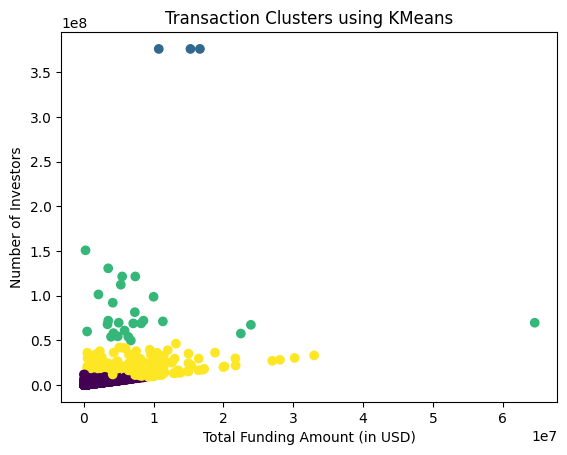

In [9]:
# Drop rows with NA in relevant columns
df_mv = big_df.dropna(subset=['Money Raised (in USD)', 'Funding Type', 'Funding Stage', 'Total Funding Amount (in USD)'])

# Clustering Total Funding Amount using KMeans
features = df_mv[['Money Raised (in USD)', 'Funding Type', 'Funding Stage', 'Total Funding Amount (in USD)']]

# Encode categorical variables like 'Funding Type' and 'Funding Stage'
features = pd.get_dummies(features, columns=['Funding Type', 'Funding Stage'], drop_first=True)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_mv['transaction_cluster'] = kmeans.fit_predict(features)

# Display unique clusters
print("Unique Transaction Clusters:", np.unique(df_mv['transaction_cluster']))

# Plotting the clusters (using the first two features for visualization)
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df_mv['transaction_cluster'], cmap='viridis')
plt.xlabel('Total Funding Amount (in USD)')
plt.ylabel('Number of Investors')
plt.title('Transaction Clusters using KMeans')
plt.show()

# Left join the 'funding_amount_cluster' column with the original big_df
big_df = big_df.merge(df_mv[['transaction_cluster']], left_index=True, right_index=True, how='left')

In [134]:
big_df.head(5)

,Transaction Name,Transaction Name URL,Organization Industries,Lead Investors,Investor Names,Money Raised,Money Raised Currency,Money Raised (in USD),Funding Type,Announced Date,...,Funding Stage,Number of Funding Rounds,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Equity Only Funding,Funding Status,Number of Investors,transaction_cluster_x,transaction_cluster_y
0,Seed Round - Flagright,https://www.crunchbase.com/funding_round/flagr...,"Compliance, Financial Services, FinTech, Fraud...",Moonfire Ventures,"Charles Delingpole, Donald Bringmann, Erik Mut...",2800000.0,USD,2800000.0,Seed,2022-07-07,...,Seed,1,2800000.0,USD,2800000.0,Yes,Seed,11.0,0.0,0.0
1,Seed Round - aboutuz,https://www.crunchbase.com/funding_round/about...,"Apps, Lifestyle, Mobile, Social Media",FasterCapital,FasterCapital,632000.0,USD,632000.0,Seed,2022-03-01,...,Seed,1,632000.0,USD,632000.0,Yes,Seed,1.0,0.0,0.0
2,Seed Round - Kubermatic,https://www.crunchbase.com/funding_round/kuber...,"Enterprise, SaaS, Software",NetApp Excellerator,NetApp Excellerator,NaN,NaN,NaN,Seed,2022-04-27,...,Seed,3,8300000.0,USD,8300000.0,Yes,Seed,1.0,NaN,NaN
3,Seed Round - MYNE Homes,https://www.crunchbase.com/funding_round/myne-...,"Real Estate, Real Estate Investment, Rental Pr...",NaN,"Alexander Artope, Christian Gaiser, Embedded C...",23500000.0,EUR,23938847.0,Seed,2022-07-08,...,Seed,4,63500000.0,EUR,67268844.0,Yes,Early Stage Venture,15.0,2.0,0.0
4,Pre Seed Round - Emulate Energy,https://www.crunchbase.com/funding_round/emula...,"Energy, Energy Efficiency, Software",NaN,"AxSol, Edument, Skellefteå Kraft, Utvecklingsk...",21956027.0,SEK,2092864.0,Pre-Seed,2022-07-15,...,Seed,3,56561291.0,SEK,5396545.0,Yes,Seed,4.0,0.0,0.0


In [10]:
# Generate descriptive names for each cluster based on centroid values
cluster_centroids = kmeans.cluster_centers_
cluster_names = []
feature_means = features.mean(axis=0)
feature_std = features.std(axis=0)  # Calculate standard deviation for determining medium values
threshold_high = 0.8  # Threshold for significant high difference
threshold_low = 0.1  # Threshold for significant low difference

for i, centroid in enumerate(cluster_centroids):
    description = []
    for j, value in enumerate(centroid):
        if value > feature_means[j] + threshold_high * feature_std[j]:
            description.append(f"High {features.columns[j]}")
        elif value < feature_means[j] - threshold_low * feature_std[j]:
            description.append(f"Low {features.columns[j]}")
        else:
            description.append(f"Medium {features.columns[j]}")
    cluster_name = f"Cluster {i}: {', '.join(description) if description else 'No significant difference'}"
    cluster_names.append(cluster_name)
    print(cluster_name)

Cluster 0: Low Money Raised (in USD), Low Total Funding Amount (in USD), Medium Funding Type_Seed
Cluster 1: High Money Raised (in USD), High Total Funding Amount (in USD), High Funding Type_Seed
Cluster 2: High Money Raised (in USD), High Total Funding Amount (in USD), Medium Funding Type_Seed
Cluster 3: High Money Raised (in USD), Medium Total Funding Amount (in USD), Medium Funding Type_Seed


/var/folders/cw/nsgz30_17pq84g4s1jh0lgtw0000gp/T/ipykernel_79986/823160887.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if value > feature_means[j] + threshold_high * feature_std[j]:
/var/folders/cw/nsgz30_17pq84g4s1jh0lgtw0000gp/T/ipykernel_79986/823160887.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif value < feature_means[j] - threshold_low * feature_std[j]:


## Topic Modeling for Organization Descriptions

Topic 0: ['offers', 'technology', 'ai', 'services', 'solutions', 'develops', 'based', 'provides', 'company', 'software']


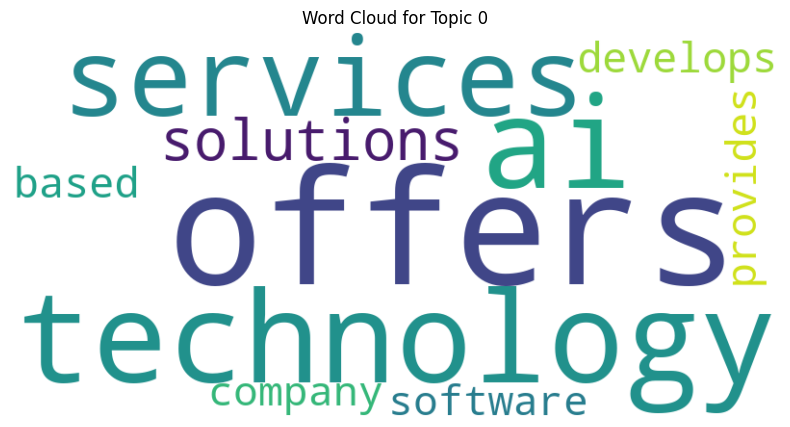

Topic 1: ['data', 'estate', 'solutions', 'tech', 'industry', 'offers', 'health', 'real', 'digital', 'platform']


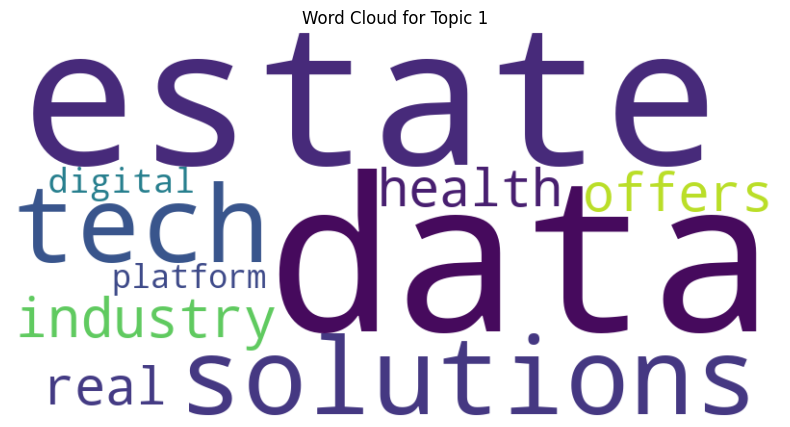

Topic 2: ['management', 'provides', 'products', 'platform', 'service', 'solution', 'saas', 'company', 'energy', 'ai']


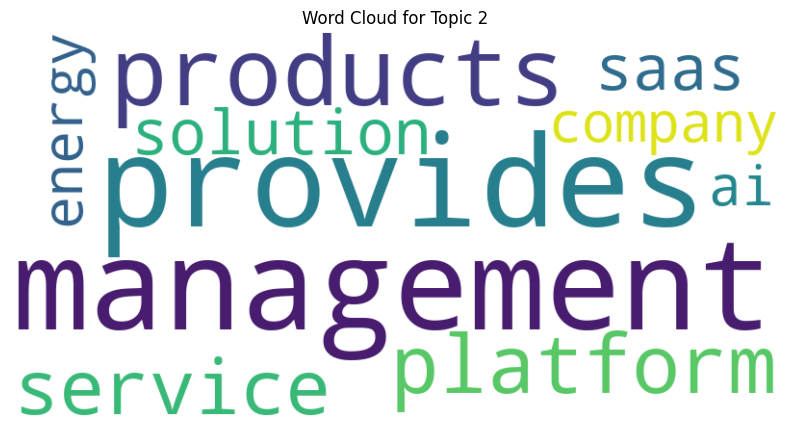

Topic 3: ['online', 'saas', 'data', 'social', 'building', 'intelligence', 'mobile', 'ai', 'app', 'platform']


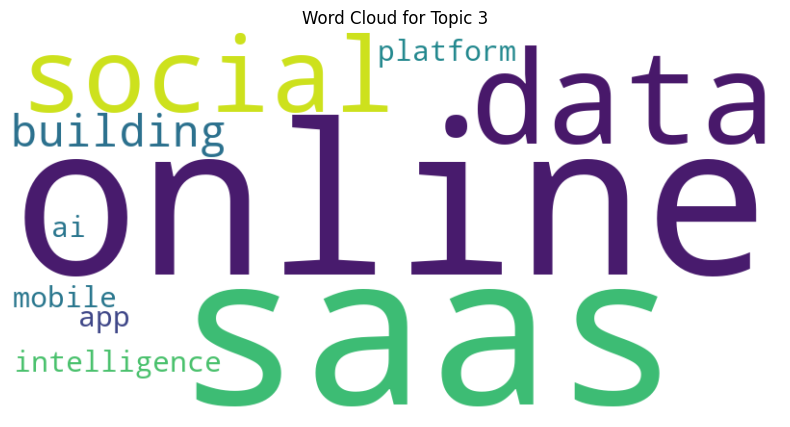

Topic 4: ['digital', 'automation', 'company', 'saas', 'management', 'helps', 'ai', 'companies', 'data', 'platform']


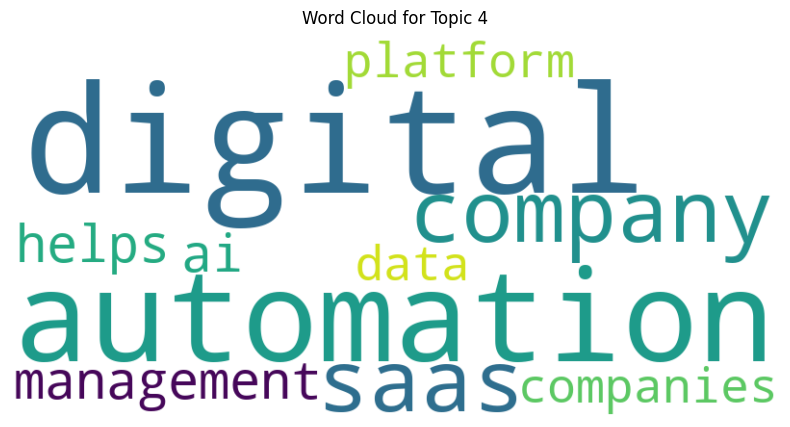

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

df_tp = big_df.dropna(subset=['Organization Description'])


# Vectorize the text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
desc_vectorized = vectorizer.fit_transform(big_df['Organization Description'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(desc_vectorized)

# Print the top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Get the top 30 words for each topic
    print(f"Topic {i}: {top_words}")
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {i}")
    plt.show()


## Create Labels for Company
Further it is tried to create a more unified label for the companies. Currently the description as well as the industry data field contain a variety of different labels. 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Combine 'Organization Industries' and 'Organization Description' fields
big_df['combined_text'] = big_df['Organization Industries'].fillna('') + ' ' + big_df['Organization Description'].fillna('')

# Drop rows with empty combined text
df_combined = big_df.dropna(subset=['Organization Industries'])

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined['Organization Industries'])

# Apply KMeans clustering
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_combined['company_cluster'] = kmeans.fit_predict(tfidf_matrix)

# Print unique clusters
print("Unique Company Clusters:", df_combined['company_cluster'].unique())

# Apply LDA on each cluster to generate topic-based labels
words = tfidf_vectorizer.get_feature_names_out()
for cluster_id in range(n_clusters):
    # Filter companies in the current cluster
    cluster_data = df_combined[df_combined['company_cluster'] == cluster_id]
    cluster_matrix = tfidf_vectorizer.transform(cluster_data['Organization Industries'])
    
    # Apply LDA to the cluster data
    lda = LatentDirichletAllocation(n_components=1, random_state=42)
    lda.fit(cluster_matrix)
    
    # Get the top words for the topic
    topic_words = [words[i] for i in lda.components_[0].argsort()[-5:]]
    print(f"Cluster {cluster_id} Label: {' '.join(topic_words)}")

# Merge cluster labels back to the original DataFrame
big_df = big_df.merge(df_combined[['company_cluster']], left_index=True, right_index=True, how='left')


/var/folders/cw/nsgz30_17pq84g4s1jh0lgtw0000gp/T/ipykernel_78860/1699830520.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['company_cluster'] = kmeans.fit_predict(tfidf_matrix)


Unique Company Clusters: [5 1 4 0 3 6 2]
Cluster 0 Label: clean cleantech efficiency renewable energy
Cluster 1 Label: services manufacturing commerce food software
Cluster 2 Label: fintech financial cryptocurrency web3 blockchain
Cluster 3 Label: device wellness medical care health
Cluster 4 Label: enterprise data b2b software saas
Cluster 5 Label: internet services software technology information
Cluster 6 Label: learning software artificial intelligence ai


## Company Embeddings based on labels
- These embeddings represent the semantic relationships between the companies. Companies with similar descriptions and industries should have embeddings that are close to each other in the high-dimensional embedding space.
- The reduced dimensions are named as "t-SNE Component 1", "t-SNE Component 2", and "t-SNE Component 3". These components do not have intrinsic meaning but represent transformations that maintain neighborhood relationships from the original space.
- Companies that fall into the same cluster are expected to have some degree of similarity in their industries and descriptions, meaning they might be working in similar domains or focusing on similar market segments.

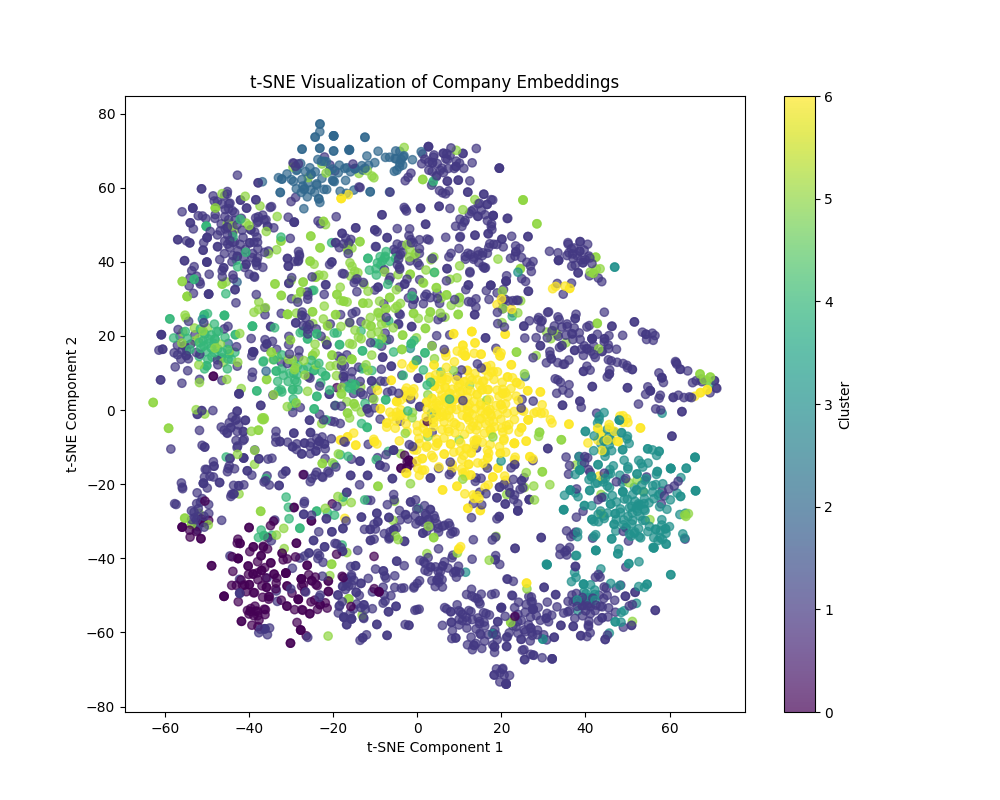

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mplcursors/_pick_info.py:162: UserWarning: Pick support for QuadMesh is missing.
  warnings.warn(f"Pick support for {type(artist).__name__} is missing.")


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Combine 'Organization Industries' and 'Organization Description' fields
big_df['combined_text'] = big_df['Organization Industries'].fillna('') + ' ' + big_df['Organization Description'].fillna('')

# Drop rows with empty combined text
df_combined = big_df.dropna(subset=['Organization Industries'])

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined['Organization Industries'])

# Apply KMeans clustering
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_combined['company_cluster'] = kmeans.fit_predict(tfidf_matrix)

# Print unique clusters
print("Unique Company Clusters:", df_combined['company_cluster'].unique())

# Apply LDA on each cluster to generate topic-based labels
words = tfidf_vectorizer.get_feature_names_out()
for cluster_id in range(n_clusters):
    # Filter companies in the current cluster
    cluster_data = df_combined[df_combined['company_cluster'] == cluster_id]
    cluster_matrix = tfidf_vectorizer.transform(cluster_data['Organization Industries'])
    
    # Apply LDA to the cluster data
    lda = LatentDirichletAllocation(n_components=1, random_state=42)
    lda.fit(cluster_matrix)
    
    # Get the top words for the topic
    topic_words = [words[i] for i in lda.components_[0].argsort()[-5:]]
    print(f"Cluster {cluster_id} Label: {' '.join(topic_words)}")

# Merge cluster labels back to the original DataFrame
big_df = big_df.merge(df_combined[['company_cluster']], left_index=True, right_index=True, how='left')

# Plot the embeddings using t-SNE
embeddings_np = embeddings.cpu().numpy()
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_np)

# Plot the companies colored by cluster
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=big_df['company_cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of Company Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Only companies of cluster 3 and 4 seem to actually have a semantic realtionship. The other ones do not. Thus it is not acceptable to use labels created by 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Cluster 0 Label: management saas technology information software
Cluster 1 Label: blockchain apps media social commerce
Cluster 2 Label: electronics machinery industrial biotechnology manufacturing
Cluster 3 Label: enablement energy engine electronics young
Cluster 4 Label: machine software artificial intelligence ai
Cluster 5 Label: payments finance fintech services financial
Cluster 6 Label: clean efficiency cleantech renewable energy
Cluster 7 Label: device wellness medical care health
Cluster 8 Label: delivery organic processing beverage food
Cluster 9 Label: management software property real estate


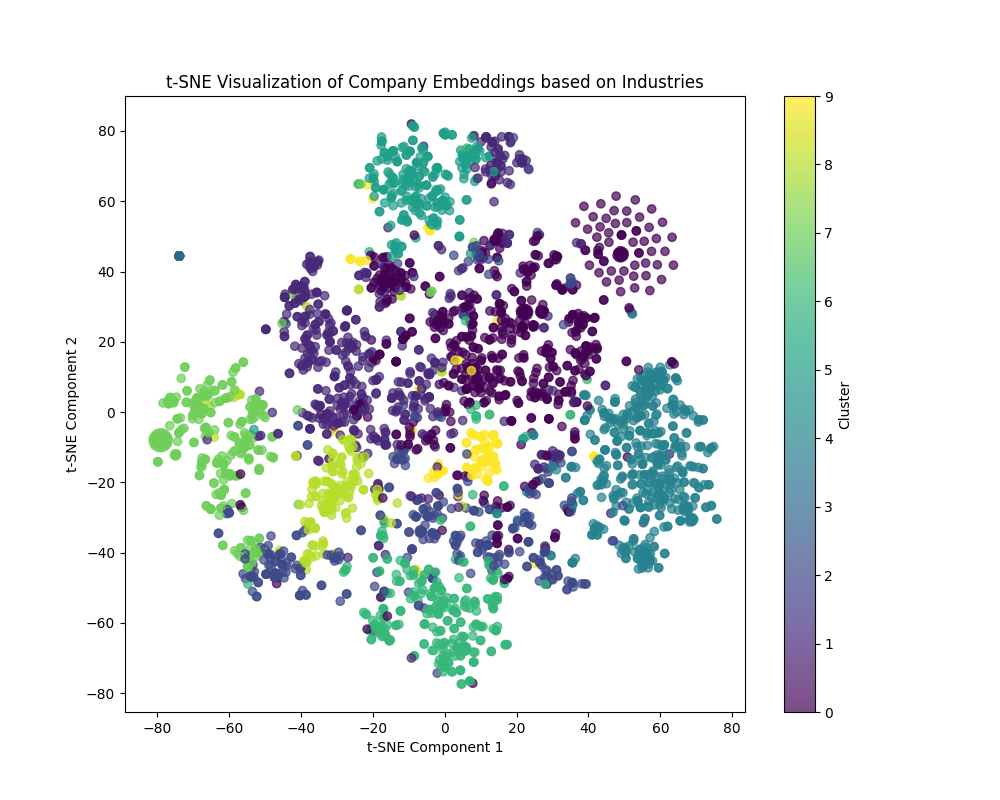

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import mplcursors
%matplotlib ipympl

# Combine 'Organization Industries' field
big_df['cleaned_industries'] = big_df['Organization Industries'].fillna('').str.lower()

# Generate embeddings for 'Organization Industries' using Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')
industries_embeddings = model.encode(big_df['cleaned_industries'].tolist(), convert_to_tensor=True)

# Apply KMeans clustering to the embeddings
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
big_df['company_cluster'] = kmeans.fit_predict(industries_embeddings.cpu().numpy())

# Extract top keywords for each cluster using TF-IDF and NMF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(big_df['cleaned_industries'])

for cluster_id in range(n_clusters):
    # Filter companies in the current cluster
    cluster_data = big_df[big_df['company_cluster'] == cluster_id]['cleaned_industries']
    cluster_matrix = tfidf_vectorizer.transform(cluster_data)
    
    # Apply NMF for topic extraction
    nmf = NMF(n_components=1, random_state=42)
    nmf.fit(cluster_matrix)
    
    # Get top keywords for labeling
    words = tfidf_vectorizer.get_feature_names_out()
    topic_keywords = [words[i] for i in nmf.components_[0].argsort()[-5:]]
    label = ' '.join(topic_keywords)
    big_df.loc[big_df['company_cluster'] == cluster_id, 'industry_label'] = label
    print(f"Cluster {cluster_id} Label: {label}")

# Plot the embeddings using t-SNE
embeddings_np = industries_embeddings.cpu().numpy()
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_np)

# Plot the companies colored by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=big_df['company_cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of Company Embeddings based on Industries')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Add interactive cursor to display company names
cursor = mplcursors.cursor(scatter, hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.index
    sel.annotation.set_text(big_df.iloc[index]['Organization Description'])

plt.show()

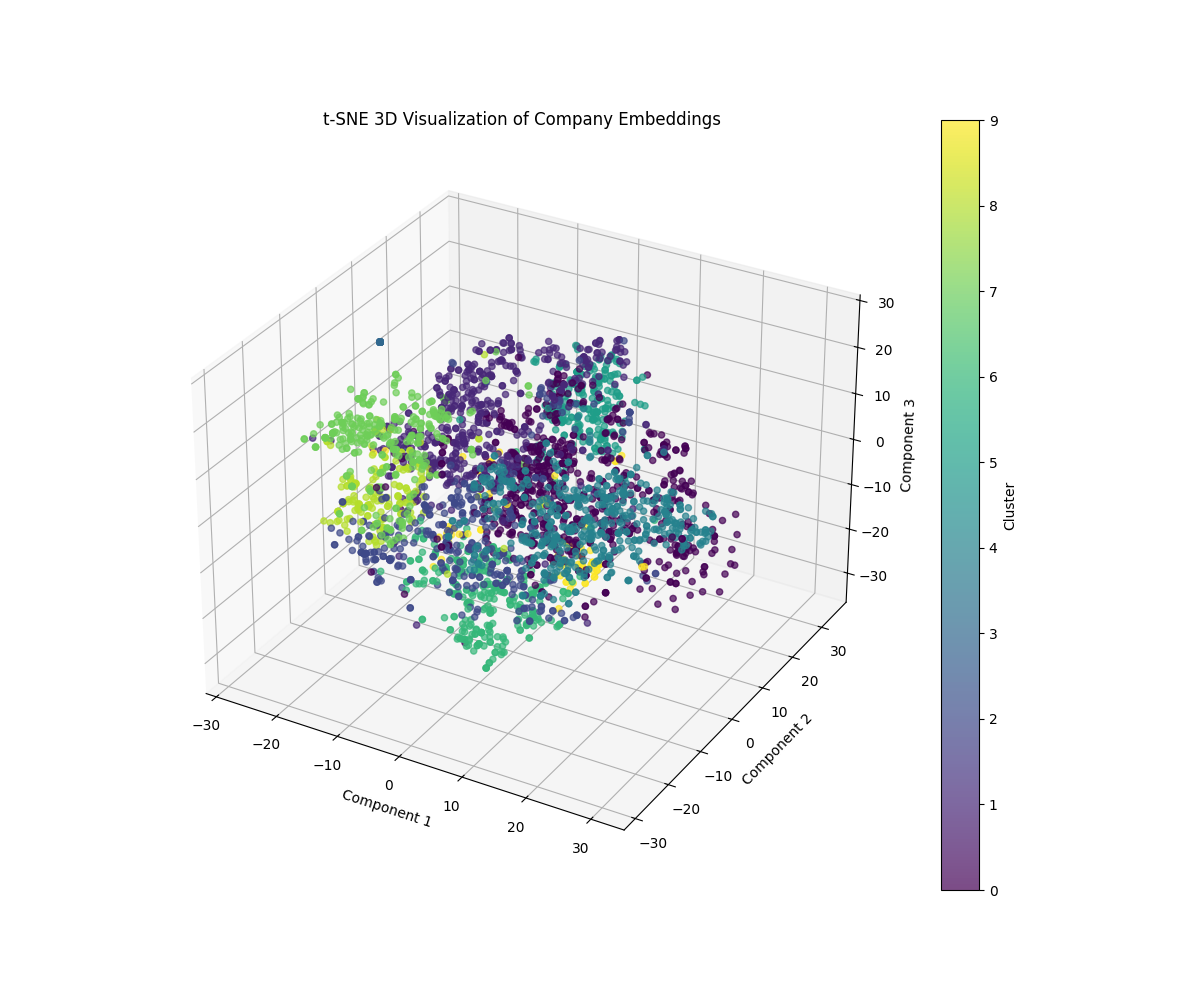

In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import mplcursors


# Plot the embeddings using t-SNE for 3D visualization
embeddings_np = industries_embeddings.cpu().numpy()
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_np)

# Plot the companies colored by cluster in 3D with interactivity
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=big_df['company_cluster'], cmap='viridis', alpha=0.7)
ax.set_title('t-SNE 3D Visualization of Company Embeddings')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
fig.colorbar(scatter, label='Cluster')

# Add interactive cursor to display company names
cursor = mplcursors.cursor(scatter, hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.index
    sel.annotation.set_text(big_df.iloc[index]['Organization Name'])

plt.show()